# 🔍 Análise Exploratória — Diagnóstico de Doença Cardíaca

Este notebook tem como objetivo realizar uma análise exploratória do conjunto de dados sobre doenças cardíacas, obtido via Kaggle. Através da inspeção visual e estatística das variáveis, buscamos compreender padrões, correlações e possíveis relações entre os atributos clínicos e a presença de doença cardíaca.

A análise inclui:
- Verificação de dados faltantes
- Distribuição da variável alvo (`target`)
- Correlações entre variáveis
- Análise de variáveis categóricas e contínuas
- Identificação de possíveis vieses ou tendências demográficas

Essas etapas são fundamentais para orientar o pré-processamento e a modelagem preditiva que serão realizadas nos próximos notebooks.


In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregamento do dataset
df = pd.read_csv('/content/heart.csv')

In [4]:
# Visão geral dos dados
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


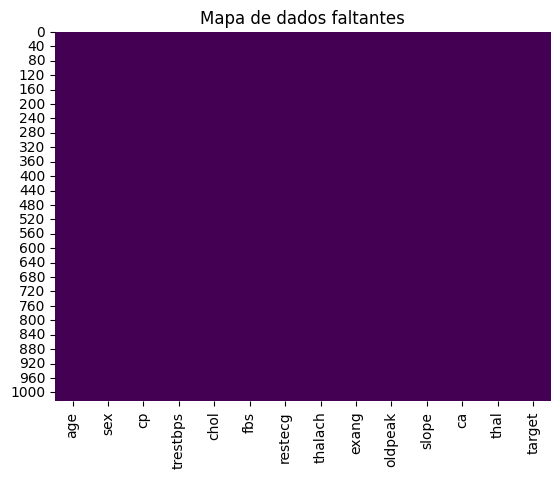

In [6]:
# Verificação de dados faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de dados faltantes')
plt.show()

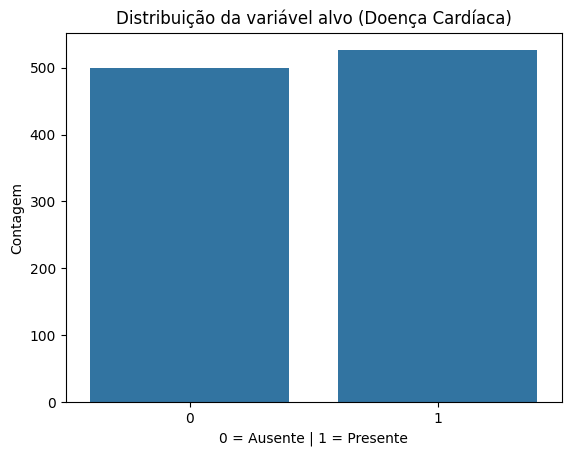

In [7]:
# Distribuição da variável alvo
sns.countplot(x='target', data=df)
plt.title('Distribuição da variável alvo (Doença Cardíaca)')
plt.xlabel('0 = Ausente | 1 = Presente')
plt.ylabel('Contagem')
plt.show()

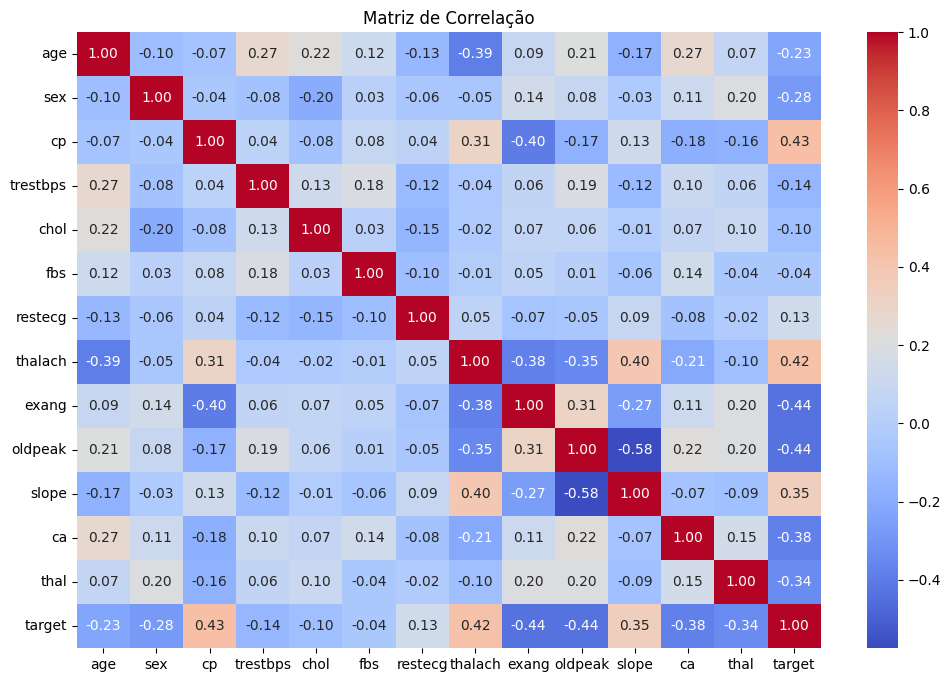

In [8]:
# Correlação entre variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

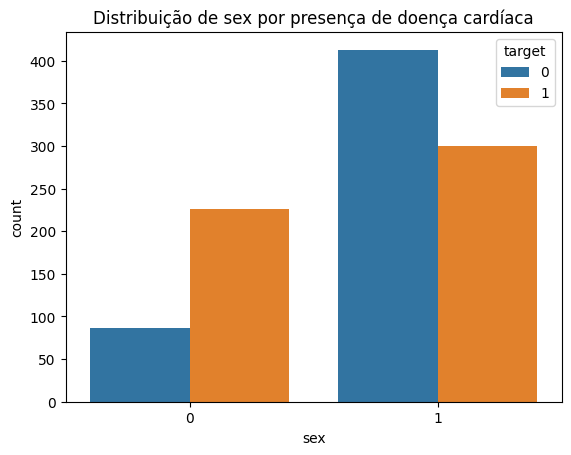

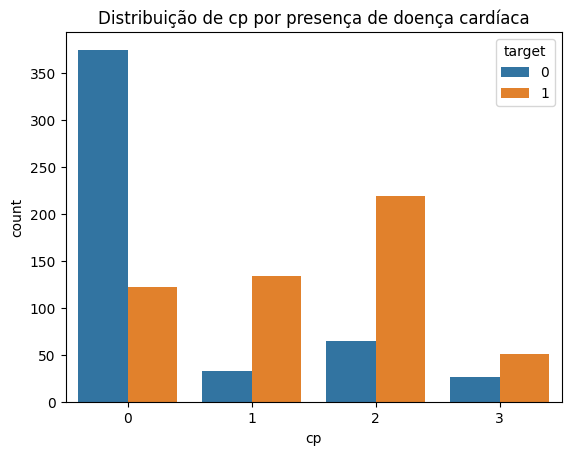

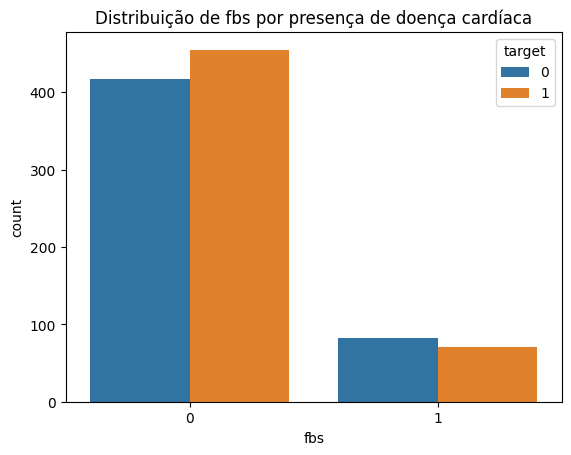

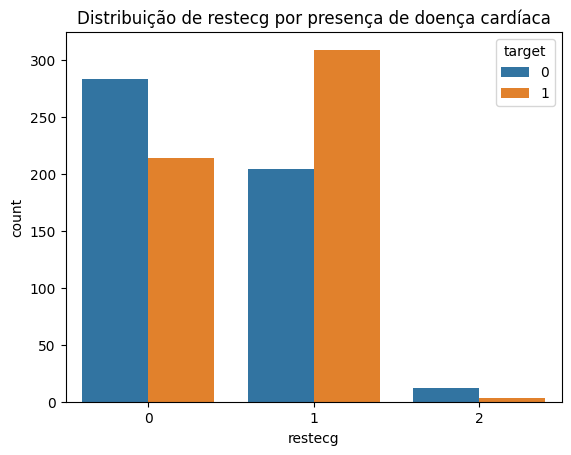

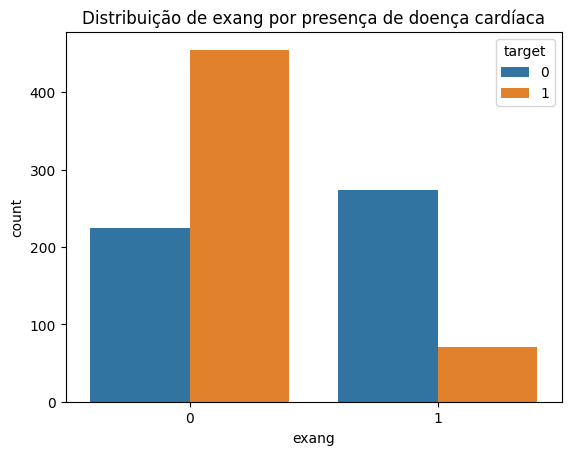

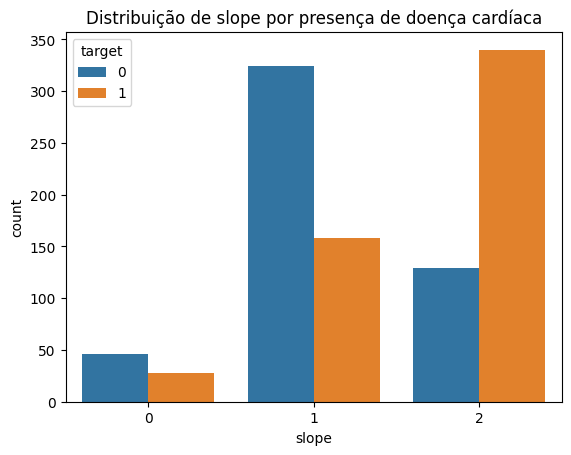

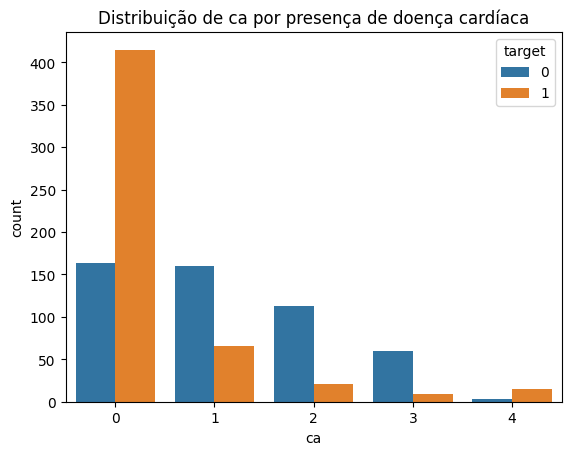

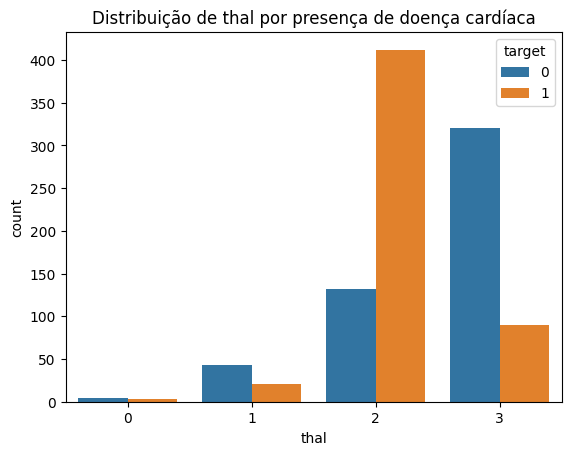

In [9]:
# Análise de variáveis categóricas
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'Distribuição de {col} por presença de doença cardíaca')
    plt.show()

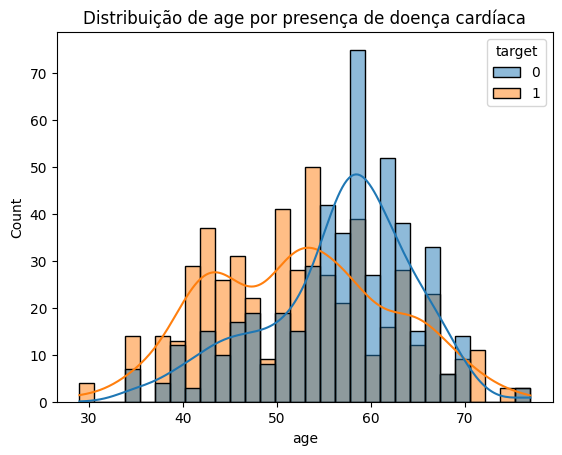

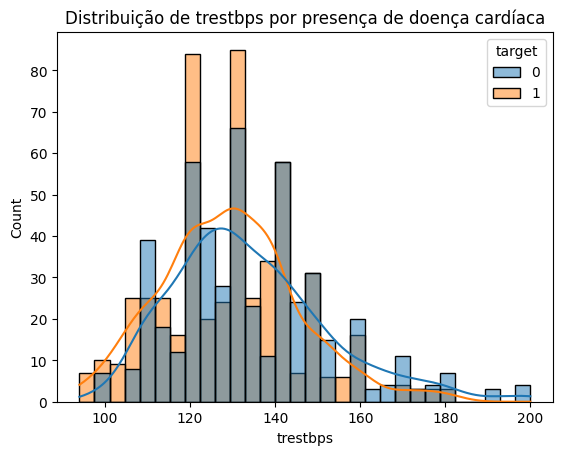

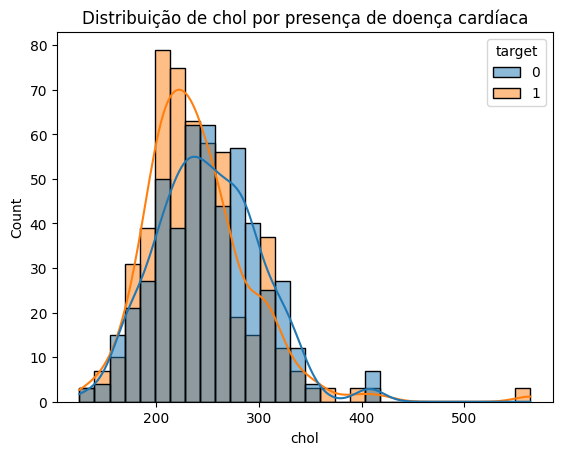

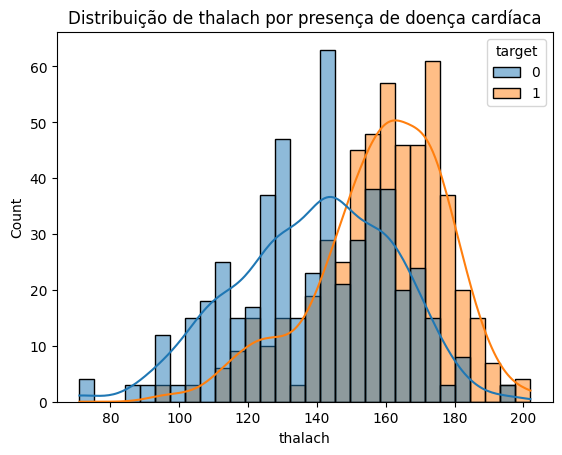

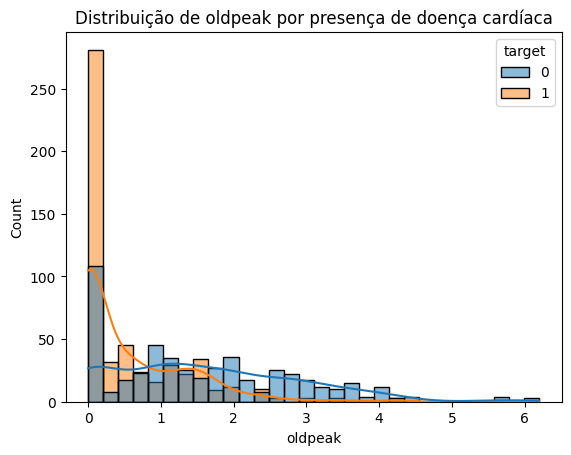

In [10]:
# Análise de variáveis contínuas
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in continuous_cols:
    sns.histplot(x=col, hue='target', data=df, kde=True, bins=30)
    plt.title(f'Distribuição de {col} por presença de doença cardíaca')
    plt.show()

# ✅ Conclusões da Análise Exploratória

A análise revelou insights importantes:

- A distribuição da variável alvo está equilibrada, com proporções similares entre indivíduos com e sem doença cardíaca.
- A variável `age` apresenta padrões distintos entre os grupos, com maior incidência de doença cardíaca em faixas etárias mais jovens (55–60 anos).
- O atributo `sex` mostra uma diferença relevante: indivíduos do sexo 0 (feminino) têm maior proporção de casos positivos.
- A matriz de correlação indica que variáveis como `cp` (tipo de dor no peito), `thalach` (frequência cardíaca máxima) e `oldpeak` têm forte relação com o diagnóstico.
- Não foram identificados dados faltantes, o que facilita o processo de modelagem.

Esses achados serão utilizados para selecionar e transformar variáveis relevantes na etapa de pré-processamento e construção dos modelos preditivos.
